In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
data = pd.read_csv(r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\yahoo_stock.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

## Train_Test_Split

In [4]:
train_size = int(len(data['Close']) * 0.9)
train_data = data[:train_size]
test_data = data[train_size:]

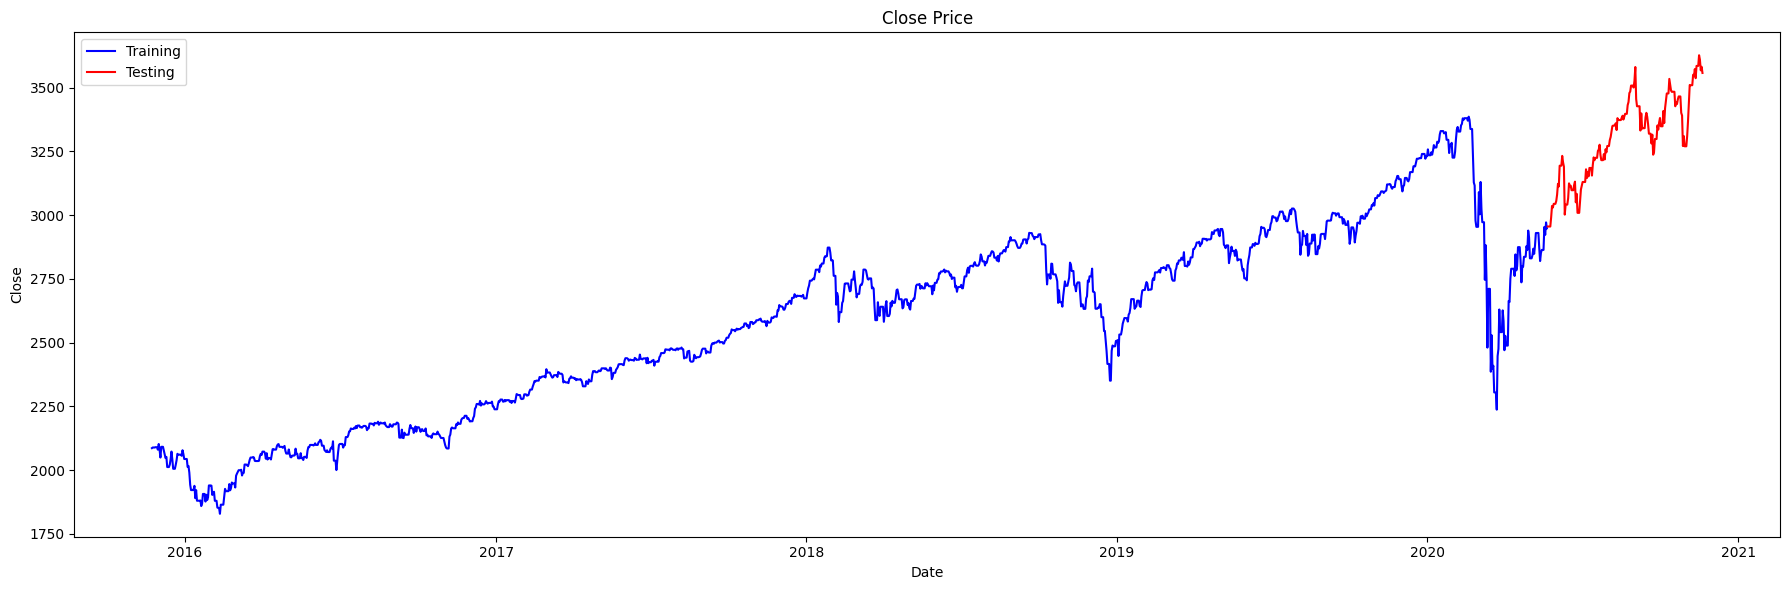

In [5]:
plt.figure(figsize=(18, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training', color='blue')
plt.plot(test_data['Date'], test_data['Close'], label='Testing', color='red')

plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
train_data = train_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
test_data = test_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}) 

# Model Training

In [7]:
model = Prophet()

In [8]:
model.fit(train_data[['ds', 'y']])


13:22:11 - cmdstanpy - INFO - Chain [1] start processing
13:22:13 - cmdstanpy - INFO - Chain [1] done processing


# Creating Dataframe with Predicted Values 

In [9]:
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-23,1875.950749,1844.948058,2079.303254,1875.950749,1875.950749,90.486020,90.486020,90.486020,-1.686555,-1.686555,-1.686555,92.172575,92.172575,92.172575,0.0,0.0,0.0,1966.436768
1,2015-11-24,1876.309943,1858.665032,2095.465689,1876.309943,1876.309943,95.036013,95.036013,95.036013,0.063032,0.063032,0.063032,94.972981,94.972981,94.972981,0.0,0.0,0.0,1971.345956
2,2015-11-25,1876.669137,1867.930668,2097.153554,1876.669137,1876.669137,98.754968,98.754968,98.754968,1.095313,1.095313,1.095313,97.659655,97.659655,97.659655,0.0,0.0,0.0,1975.424105
3,2015-11-26,1877.028331,1854.433453,2086.748178,1877.028331,1877.028331,100.784783,100.784783,100.784783,0.567784,0.567784,0.567784,100.216999,100.216999,100.216999,0.0,0.0,0.0,1977.813114
4,2015-11-27,1877.387525,1863.165934,2094.908303,1877.387525,1877.387525,103.156858,103.156858,103.156858,0.528846,0.528846,0.528846,102.628012,102.628012,102.628012,0.0,0.0,0.0,1980.544383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,2900.135537,2651.628863,3269.778163,2613.925889,3186.901743,71.152005,71.152005,71.152005,-1.686555,-1.686555,-1.686555,72.838561,72.838561,72.838561,0.0,0.0,0.0,2971.287542
1821,2020-11-17,2899.874439,2677.729386,3283.309732,2611.399268,3189.039785,76.156580,76.156580,76.156580,0.063032,0.063032,0.063032,76.093548,76.093548,76.093548,0.0,0.0,0.0,2976.031019
1822,2020-11-18,2899.613342,2649.388670,3305.480017,2607.888166,3191.322348,80.392997,80.392997,80.392997,1.095313,1.095313,1.095313,79.297684,79.297684,79.297684,0.0,0.0,0.0,2980.006339
1823,2020-11-19,2899.352244,2653.105751,3294.052030,2604.377063,3193.292929,83.012128,83.012128,83.012128,0.567784,0.567784,0.567784,82.444344,82.444344,82.444344,0.0,0.0,0.0,2982.364372


In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

In [11]:
plot_plotly(model, forecast)

In [12]:
plot_components_plotly(model,forecast)

C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



## Storing Predicted Values

In [13]:
forecasted_values = forecast['yhat'].values

## Plotting Forecast Plot

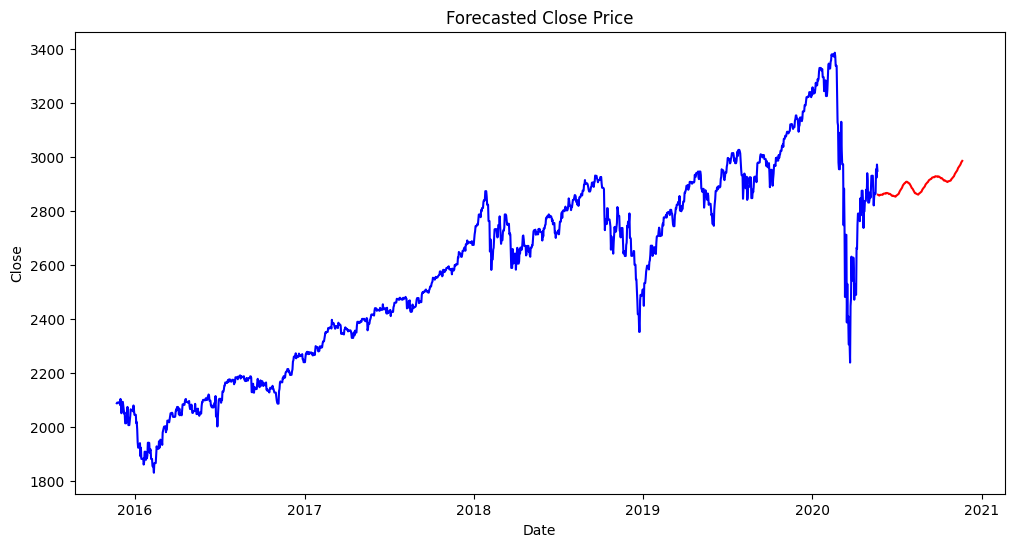

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(train_data['ds'], train_data['y'], label='Train', color='blue')
plt.plot(test_data['ds'], forecasted_values[-len(test_data):], label='Forecast', color='red')

plt.title('Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend
plt.show()


## Evaluation Metrics

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data['y'], forecasted_values[-len(test_data):])
rmse = np.sqrt(mean_squared_error(test_data['y'], forecasted_values[-len(test_data):]))
r2 = r2_score(test_data['y'], forecasted_values[-len(test_data):])

print(mae,rmse,r2)

406.7242927562126 431.5218334785332 -5.82645019469054
